In [1]:
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [6]:
#Open apsim outputs
con = sqlite3.connect(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Sorghum_V6.db')
apsim = pd.read_sql("Select * from InitialReport", con)

#Read the Simulations table that has SimulationID matched to SimulationName
Simulations = pd.read_sql("Select * from _Simulations",con)
Simulations.set_index('ID',inplace=True)
apsim.loc[:,'SimulationName'] = [Simulations.loc[apsim.loc[x,'SimulationID'],'Name'] for x in apsim.index]
list(apsim.columns)

['CheckpointID',
 'SimulationID',
 'Zone',
 'Clock.Today',
 'Weather.Latitude',
 'Weather.Longitude',
 'Weather.FileName',
 'Weather.CO2',
 'Weather.Amp',
 'Weather.Tav',
 'Soil.Physical.Depth(1)',
 'Soil.Physical.Depth(2)',
 'Soil.Physical.Depth(3)',
 'Soil.Physical.Depth(4)',
 'Soil.Physical.Depth(5)',
 'Soil.Physical.Depth(6)',
 'Soil.Physical.Depth(7)',
 'TotalDepth',
 'Soil.Physical.Thickness(1)',
 'Soil.Physical.Thickness(2)',
 'Soil.Physical.Thickness(3)',
 'Soil.Physical.Thickness(4)',
 'Soil.Physical.Thickness(5)',
 'Soil.Physical.Thickness(6)',
 'Soil.Physical.Thickness(7)',
 'Soil.Physical.SorghumSoil.LL(1)',
 'Soil.Physical.SorghumSoil.LL(2)',
 'Soil.Physical.SorghumSoil.LL(3)',
 'Soil.Physical.SorghumSoil.LL(4)',
 'Soil.Physical.SorghumSoil.LL(5)',
 'Soil.Physical.SorghumSoil.LL(6)',
 'Soil.Physical.SorghumSoil.LL(7)',
 'MeanLL',
 'Soil.Physical.SorghumSoil.XF(1)',
 'Soil.Physical.SorghumSoil.XF(2)',
 'Soil.Physical.SorghumSoil.XF(3)',
 'Soil.Physical.SorghumSoil.XF(4)',
 

In [7]:
#reduce the dataframes
df=apsim.drop(['CheckpointID', 'SimulationID', 'Zone', 'Clock.Today','Soil.Physical.Depth(1)',
       'Soil.Physical.Depth(2)', 'Soil.Physical.Depth(3)',
       'Soil.Physical.Depth(4)', 'Soil.Physical.Depth(5)',
       'Soil.Physical.Depth(6)', 'Soil.Physical.Depth(7)',
       'Soil.Physical.Thickness(1)', 'Soil.Physical.Thickness(2)',
       'Soil.Physical.Thickness(3)', 'Soil.Physical.Thickness(4)',
       'Soil.Physical.Thickness(5)', 'Soil.Physical.Thickness(6)',
       'Soil.Physical.Thickness(7)', 'Soil.Physical.SorghumSoil.LL(1)',
       'Soil.Physical.SorghumSoil.LL(2)', 'Soil.Physical.SorghumSoil.LL(3)',
       'Soil.Physical.SorghumSoil.LL(4)', 'Soil.Physical.SorghumSoil.LL(5)',
       'Soil.Physical.SorghumSoil.LL(6)', 'Soil.Physical.SorghumSoil.LL(7)',
       'Soil.Physical.SorghumSoil.XF(1)', 'Soil.Physical.SorghumSoil.XF(2)',
       'Soil.Physical.SorghumSoil.XF(3)', 'Soil.Physical.SorghumSoil.XF(4)',
       'Soil.Physical.SorghumSoil.XF(5)', 'Soil.Physical.SorghumSoil.XF(6)',
       'Soil.Physical.SorghumSoil.XF(7)', 'Soil.Physical.DUL(1)',
       'Soil.Physical.DUL(2)', 'Soil.Physical.DUL(3)', 'Soil.Physical.DUL(4)',
       'Soil.Physical.DUL(5)', 'Soil.Physical.DUL(6)', 'Soil.Physical.DUL(7)',
       'Soil.Chemical.NO3N(1)', 'Soil.Chemical.NO3N(2)',
       'Soil.Chemical.NO3N(3)', 'Soil.Chemical.NO3N(4)',
       'Soil.Chemical.NO3N(5)', 'Soil.Chemical.NO3N(6)',
       'Soil.Chemical.NO3N(7)', 'Soil.Chemical.NH4N(1)',
       'Soil.Chemical.NH4N(2)', 'Soil.Chemical.NH4N(3)',
       'Soil.Chemical.NH4N(4)', 'Soil.Chemical.NH4N(5)',
       'Soil.Chemical.NH4N(6)', 'Soil.Chemical.NH4N(7)', 'Soil.Organic.FOM(1)',
       'Soil.Organic.FOM(2)', 'Soil.Organic.FOM(3)', 'Soil.Organic.FOM(4)',
       'Soil.Organic.FOM(5)', 'Soil.Organic.FOM(6)', 'Soil.Organic.FOM(7)',
       'Soil.Organic.SoilCNRatio(1)', 'Soil.Organic.SoilCNRatio(2)',
       'Soil.Organic.SoilCNRatio(3)', 'Soil.Organic.SoilCNRatio(4)',
       'Soil.Organic.SoilCNRatio(5)', 'Soil.Organic.SoilCNRatio(6)',
       'Soil.Organic.SoilCNRatio(7)', 'Soil.Physical.Depth(8)',
       'Soil.Physical.Thickness(8)', 'Soil.Physical.SorghumSoil.LL(8)',
       'Soil.Physical.SorghumSoil.XF(8)', 'Soil.Physical.DUL(8)',
       'Soil.Chemical.NO3N(8)', 'Soil.Chemical.NH4N(8)', 'Soil.Organic.FOM(8)',
       'Soil.Organic.SoilCNRatio(8)', 'Soil.Physical.BD(1)',
       'Soil.Physical.BD(2)', 'Soil.Physical.BD(3)', 'Soil.Physical.BD(4)',
       'Soil.Physical.BD(5)', 'Soil.Physical.BD(6)', 'Soil.Physical.BD(7)',
       'Soil.Physical.BD(8)','Soil.Chemical.PH(1)', 'Soil.Chemical.PH(2)',
       'Soil.Chemical.PH(3)', 'Soil.Chemical.PH(4)', 'Soil.Chemical.PH(5)', 'Soil.Chemical.PH(6)',
       'Soil.Chemical.PH(7)','Soil.Chemical.PH(8)'],axis=1) 

df['climate'] = df['SimulationName'].str[:6]
df['soil'] = df['SimulationName'].str[7:11]
df['cultivar'] = df['SimulationName'].str[12:15]
df['harvest'] = df['SimulationName'].str[16:18]
df['prevcrop'] = df['SimulationName'].str[19:20]
df['all'] = 'Alldata'

In [4]:
list(df.columns)

['Weather.Latitude',
 'Weather.Longitude',
 'Weather.FileName',
 'Weather.CO2',
 'Weather.Amp',
 'Weather.Tav',
 'TotalDepth',
 'MeanLL',
 'MeanXF',
 'MeanDUL',
 'PAWC',
 'MeanBD',
 'TotalNO3N',
 'TotalNH4N',
 'MeanpH',
 'SimulationName',
 'climate',
 'soil',
 'cultivar',
 'harvest',
 'prevcrop',
 'all']

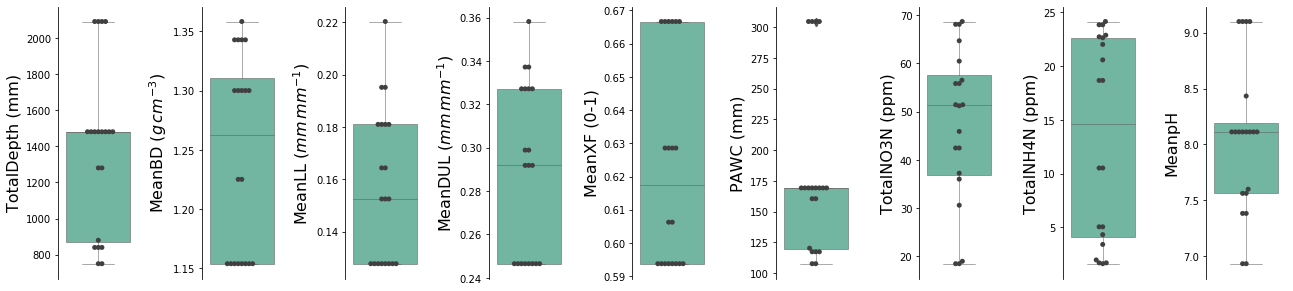

In [9]:
fig= plt.figure(figsize=(22,5))

ax=plt.subplot(1, 9, 1)
sns.boxplot(x="all", y="TotalDepth", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="TotalDepth", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('TotalDepth (mm)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 2)
sns.boxplot(x="all", y="MeanBD", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="MeanBD", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('MeanBD ($g\,cm^{-3}$)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 3)
sns.boxplot(x="all", y="MeanLL", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="MeanLL", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('MeanLL ($mm\,mm^{-1}$)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 4)
sns.boxplot(x="all", y="MeanDUL", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="MeanDUL", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('MeanDUL ($mm\,mm^{-1}$)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 5)
sns.boxplot(x="all", y="MeanXF", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="MeanXF", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('MeanXF (0-1)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 6)
sns.boxplot(x="all", y="PAWC", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="PAWC", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('PAWC (mm)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 7)
sns.boxplot(x="all", y="TotalNO3N", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="TotalNO3N", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('TotalNO3N (ppm)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 8)
sns.boxplot(x="all", y="TotalNH4N", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="TotalNH4N", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('TotalNH4N (ppm)', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

ax=plt.subplot(1, 9, 9)
sns.boxplot(x="all", y="MeanpH", data=df, linewidth=0.5, palette='Set2')
sns.swarmplot(x="all", y="MeanpH", data=df, color=".25")
ax.set_xlabel('', fontsize='medium')
plt.ylabel('MeanpH', fontsize =16)
ax.set_xticklabels([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')

####################################################################
plt.subplots_adjust(wspace=0.8, hspace=0)

#plt.savefig(r'C:\Users\jjojeda\Google Drive\COALAR\Sorgo\Python\soil.png', dpi=300,bbox_inches='tight')